# ChemTech Transactional Data

This notebook stands as a documentation and tutorial on how to use ```R``` to visualize data. In this notebook, we are going to utilize data previously cleaned, manipulated, and analyzed from the fictional chemical supply company, ChemTech. 

At the start of this process, a CSV file containing tranactional data from customers was plopped onto my desk. Using analytical skills, the data was touched on in ```Excel``` and heavily trimmed, cleaned, organized, and manipulated in ```SQL```. Currently the data is ready to visualize and assist stakeholders with possible solutions to boosting sale growth, customer satisfaction, marketing ideas, and inventory stocking. 

The dataset that we will be using will be divided into portions able to be manipulated. As opposed to one massive CSV file, the data was split into important sections using ```SQL``` queries. Each file will be explained prior to visualization. If any information is needed on file type, file size, or any previous EDA you are more than welcome to look through the ```Customer Sales``` repository. If you have already read this previous information or are looking to see a visualization, then welcome!  

Below will be the questions that we will be visualizing: 

# Customer Analysis
* Which of our customers are the top buyers?
* Which of our customers are the bottom buyers?
* For each consumer, what is the purchase quantity and purchase value?
# Product Analysis
* What is the average purchase value and frequency of each product?
* What are the most and least purchased products?
* How has the sales volume changed over time for each product?
* Which products generate the highest and lowest revenue?
# Conclusion
* Plan

## Which of our customers are the top buyers?

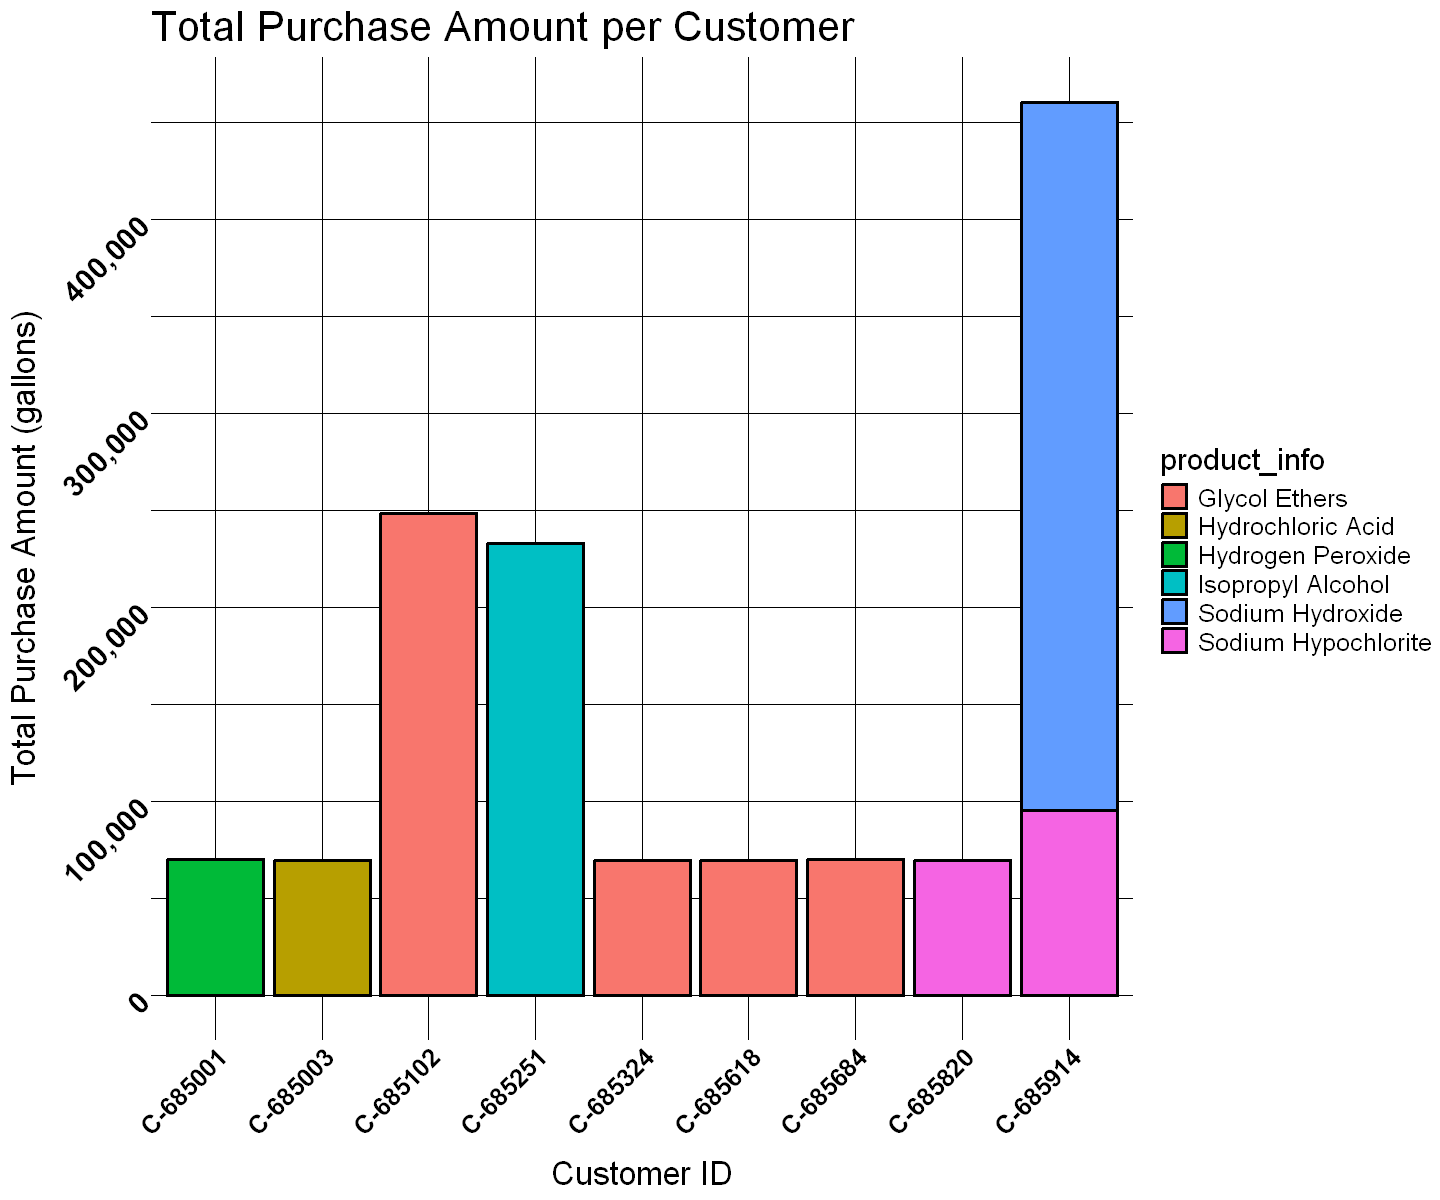

In [12]:
# Libraries, ggplot2 = more advanced plotting functions, scales = transforming data for plots.
library(ggplot2)
library(scales)

# Importing our file by choosing it directly from the path. 
file_path <- file.choose()

# Using the file to create a DataFrame('df'). 
df <- read.csv(file_path)

# Jupyter Notebook forced the plot to be condensed, this line will make the function large enough to view.
options(repr.plot.width = 12, repr.plot.height = 10) 

# Creating the bar plot based off the DataFrame('df'), labeling as follows.
ggplot(df, aes(x = customer_id, y = top_purchases, fill = product_info)) +
    geom_bar(stat = "identity", linewidth = 1, color = "black") +
    labs(title = "Total Purchase Amount per Customer", x = "Customer ID", y = "Total Purchase Amount (gallons)") +

# Changing the format of the y-axis to separate numbers with commas as opposed to exponential view.
  scale_y_continuous(labels = scales::comma) +

# Manipulating the plot's label values, background, and gridlines.  
    theme_minimal() +
    theme(panel.grid = element_line(color = "black", linewidth = .5)) +
    theme(axis.text.x = element_text(size = 15, angle = 45, hjust = 1, face = "bold", color = "black",
                        margin = margin(b = 10)), 
        axis.text.y = element_text(size = 18, angle = 45, hjust = 1, face = "bold", color = "black"),
        plot.title = element_text(size = 25),
        axis.title = element_text(size = 20),
        legend.text = element_text(size = 15),
        legend.title = element_text(size = 18))

**The output above from the "Total Purchase Amount per Customer" bar chart shows the top contributors in ChemTech's product purchasing. 10 customers are shown, out of these 10, 3 customers are shown to be far more popular than the other top buyers. Customer's C-685914, C-685102, and C-685251 are the top contributors showing a massive purchasing popularity. While the average "top buyer" buys around 70,000 gallons of product, these three show an interest in amounts ranging between 200,000 - 450,000 gallons.**

In regard to our output, the largest consumer C-685914 is shown to have a multicolored bar. This signifies the multiple products this customer indulges in and how many of each. 

## Which of our customers are the bottom buyers?

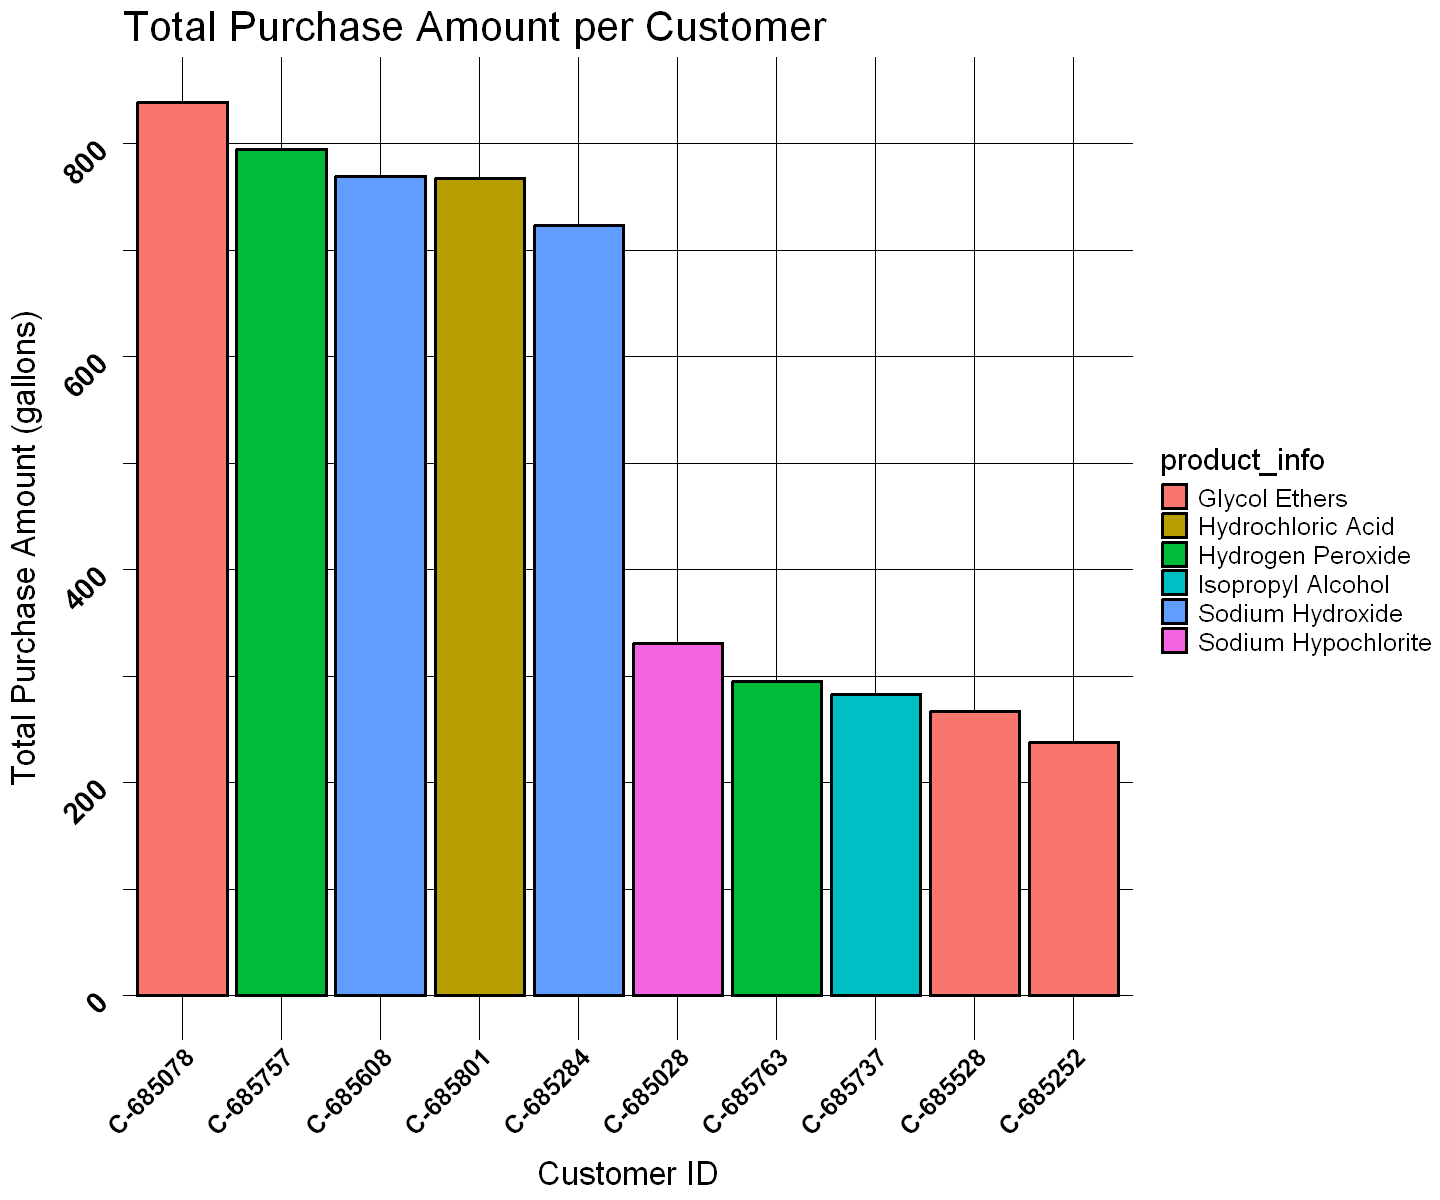

In [13]:
# Libraries, ggplot2 = more advanced plotting functions, scales = transforming data for plots.
library(ggplot2)
library(scales)

# Importing our file by choosing it directly from the path. 
file_path <- file.choose()

# Using the file to create a DataFrame('df'). 
df <- read.csv(file_path)

# Jupyter Notebook forced the plot to be condensed, this line will make the function large enough to view.
options(repr.plot.width = 12, repr.plot.height = 10)

# Visualizing the DataFrame, expressing the output in descending order as a bar plot.
ggplot(df, aes(x = reorder(customer_id, -bottom_purchases), y = bottom_purchases, fill = product_info)) + 
    geom_bar(stat = "identity", linewidth = 1, color = "black") + 
    labs(title = "Total Purchase Amount per Customer", x = "Customer ID", y = "Total Purchase Amount (gallons)") +
    
# Changing the format of the y-axis to separate numbers with commas as opposed to exponential view.    
    scale_y_continuous(labels = scales::comma) + 
    
# Manipulating the plot's label values, background, and gridlines.  
    theme_minimal() +
    theme(panel.grid = element_line(color = "black", linewidth = .5)) +
    theme(axis.text.x = element_text(size = 15, angle = 45, hjust = 1, face = "bold", color = "black",
                        margin = margin(b = 10)), 
        axis.text.y = element_text(size = 18, angle = 45, hjust = 1, face = "bold", color = "black",  
                      margin = margin(r = 10)),
        plot.title = element_text(size = 25),
        axis.title = element_text(size = 20),
        legend.text = element_text(size = 15),
        legend.title = element_text(size = 18))

**The output above from the "Total Purchase Amount per Customer" bar chart shows the bottom-most contributors in ChemTech's product purchasing. 10 customers are shown, out of these 10, 5 customers are shown to be far less popular than the other buyers.** 

**Customer's C-685252, C-685528, C-685737, C-685763, and C-685028 are the bottom-most contributors showing a uniquely low purchasing popularity. While the average "bottom buyer" buys around 700 gallons of product, these three show a decreased lump purchase amount ranging between 250 - 450 gallons.**

## For each consumer, what is the purchase quantity and purchase value?

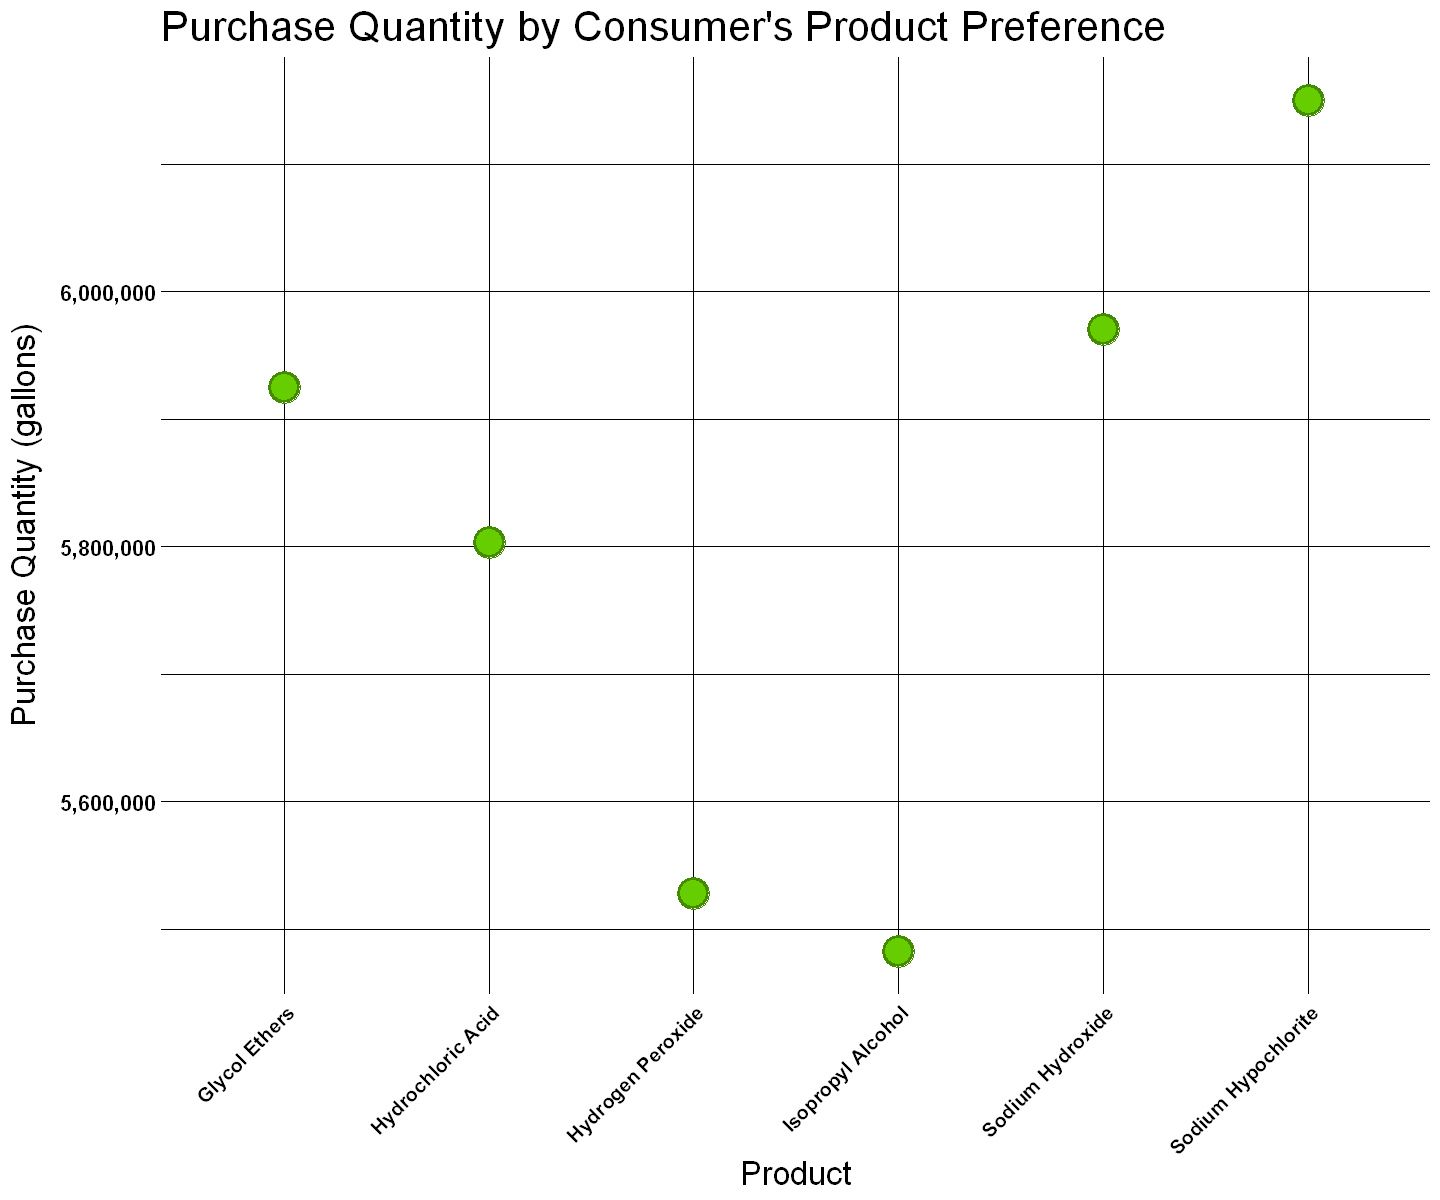

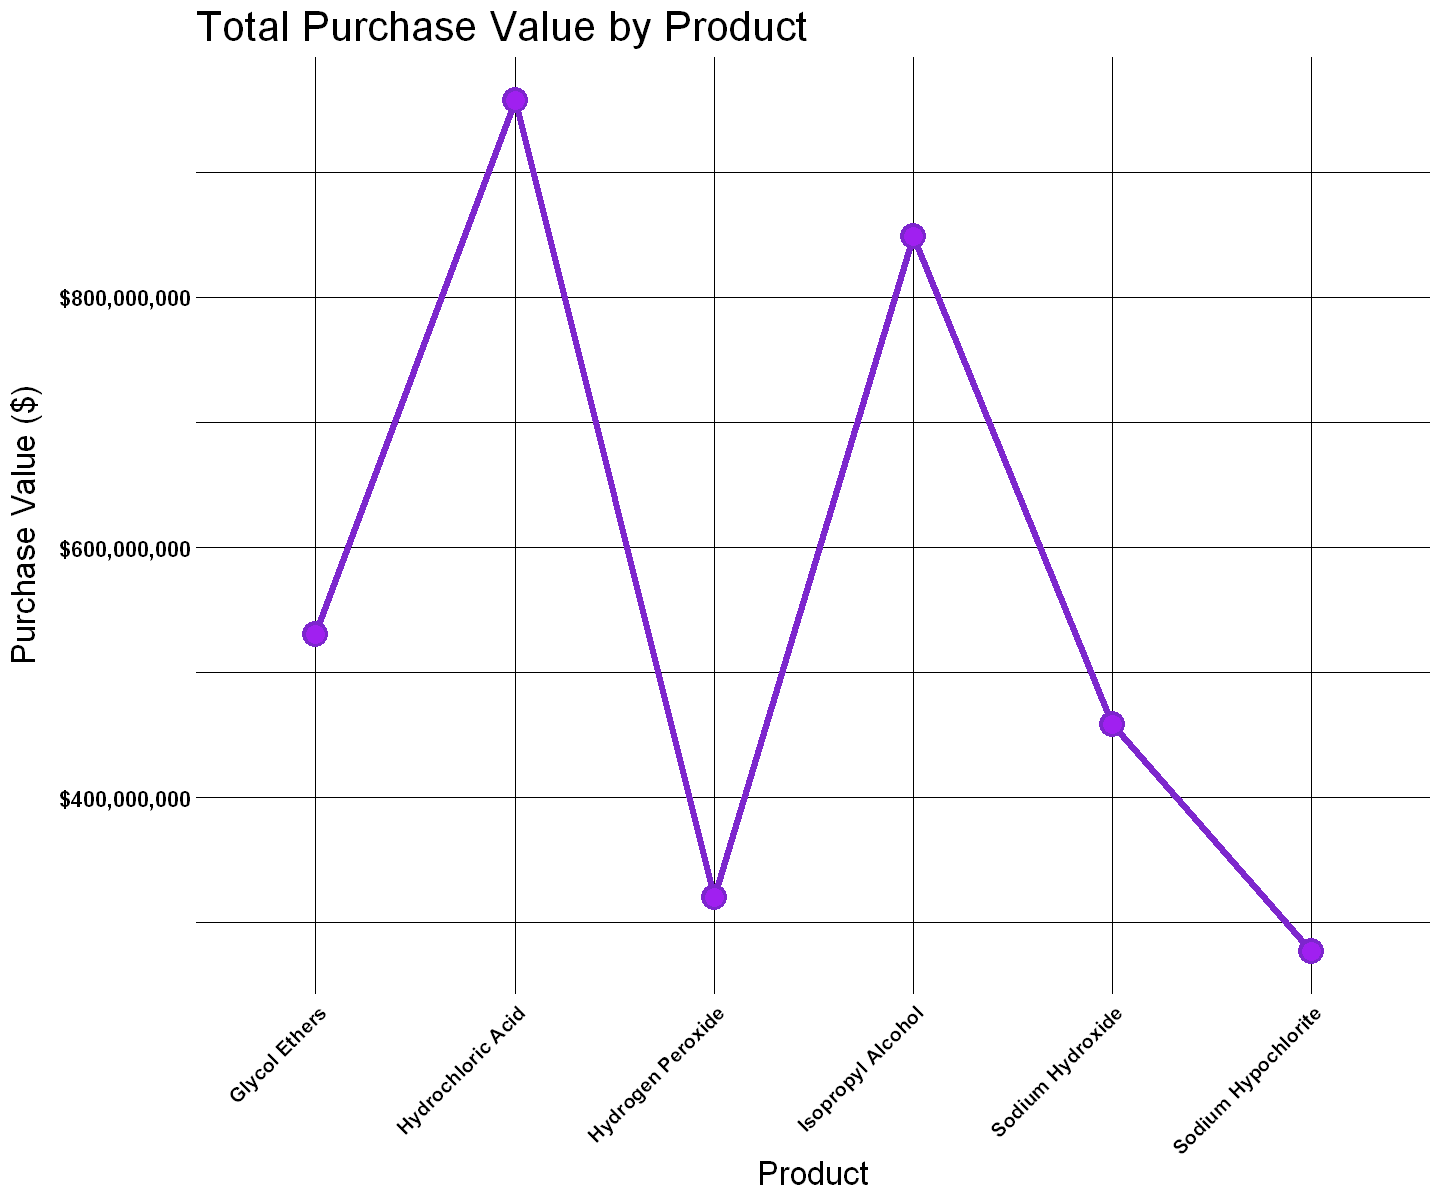

In [14]:
# Libraries, dplyr = data manipulation functions, ggplot2 = more advanced plotting functions, and scales = transforming data for plots.
library(dplyr)
library(ggplot2)
library(scales)

# Importing our file by choosing it directly from the path. 
file_path <- file.choose()

# Using the file to create a DataFrame('df'). 
df <- read.csv(file_path)

# Foundation of data, using pipe operations from 'dplyr' we can group info by 'product_info'.
# We can create two plots from these groups to answer the question above.
pipe_df <- df %>%
    group_by(product_info) %>%
    summarize(total_purchases = sum(total_purchases), purchase_value = sum(purchase_value))

# Jupyter Notebook forced the plot to be condensed, this line will make the function large enough to view.
options(repr.plot.width = 12, repr.plot.height = 10)

# Plot for Total Purchases in the format of a Scatter.
ggplot(pipe_df, aes(x = product_info, y = total_purchases)) +
    geom_point(color = "chartreuse4", size = 9) +
    geom_point(color = "chartreuse3", size = 7) +  
    labs(title = "Purchase Quantity by Consumer's Product Preference", x = "Product", y = "Purchase Quantity (gallons)") +
  
# Changing the format of the y-axis to separate numbers with commas
    scale_y_continuous(labels = scales::comma) +
  
# Manipulating the plot to have attractive text values
    theme_minimal() +
    theme(panel.grid = element_line(color = "black", linewidth = .5)) +
    theme(axis.text.x = element_text(size = 12, angle = 45, hjust = 1, face = "bold", color = "black"),
        axis.text.y = element_text(size = 13, face = "bold", color = "black", 
                      margin = margin(t = .5, r = 0, b = 0, l = 10)),
        plot.title = element_text(size = 25),
        axis.title = element_text(size = 20),
        legend.text = element_text(size = 15),
        legend.title = element_text(size = 18))

# Jupyter Notebook forced the plot to be condensed, this line will make the function large enough to view.
options(repr.plot.width = 12, repr.plot.height = 10)

# Purchase value plot visualized as a Line.
ggplot(pipe_df, aes(x = product_info, y = purchase_value, group = 1)) +
    geom_line(color = "purple3", linewidth = 2) +
    geom_point(color = "purple3", size = 7) +
    geom_point(color = "purple", size = 5) +
    labs(title = "Total Purchase Value by Product", x = "Product", y = "Purchase Value ($)") +
    scale_y_continuous(labels = scales::dollar_format()) +

# Manipulating the plot to have attractive text values
    theme_minimal() +
    theme(panel.grid = element_line(color = "black", linewidth = .5)) +
    theme(axis.text.x = element_text(size = 12, angle = 45, hjust = 1, face = "bold", color = "black"),
        axis.text.y = element_text(size = 13, face = "bold", color = "black", 
                      margin = margin(l = 10)),
        plot.title = element_text(size = 25),
        axis.title = element_text(size = 20),
        legend.text = element_text(size = 15),
        legend.title = element_text(size = 18))

Visualizing each consumer's purchase quantity and purchase value would completely clog and destroy the format of a plot. After figuring out how to make this not happen, the output above will be shown! Using R's ```group_by``` as well as ```summarize``` functions we can flatten rows and make them far more visually friendly!

These functions will show the difference in product purchase quantity and purchase value by totaling the aggregate columns and grouping them by their desired products. This will allow for a more visually friendly, yet successful diagram of how purchase quantity and purchase value preference differ throughout customers and products.

**In regard to the "Purchase Quantity by Consumer" scatter plot,  we can see a mellow output that shows a close yet differing result when it comes to the total purchase amount by product. It seems that Sodium Hypochlorite is the most purchased product, with over 6,000,000 gallons purchased in this dataset. Isopropyl Alcohol is our least purchased product, with around 5,500,000 gallons purchased in this dataset.**

**In regard to the "Total Purchase Value by Product" line plot, a massive distribution of revenue is shown. Hydrochloric Acid seems to be the product supplying ChemTech with the largest purchase value, at almost 1,000,000,000 dollars. This is in stark contrast to the lowest purchase value supplying product, Sodium HYpochlorite which shows a value of around 260,000,000 dollars.**

Comparing the two results above, it is quite interesting. While Sodium Hypochlorite is the most popular product based on the graphs shown, it is the lowest earner it terms of purchase value. This might signify that the cheaper the product, possibly the more popular it will be for customer purchase. A cost-cutting system may be proposed for increased sales growth. 

## What is the average purchase value and frequency of each product?

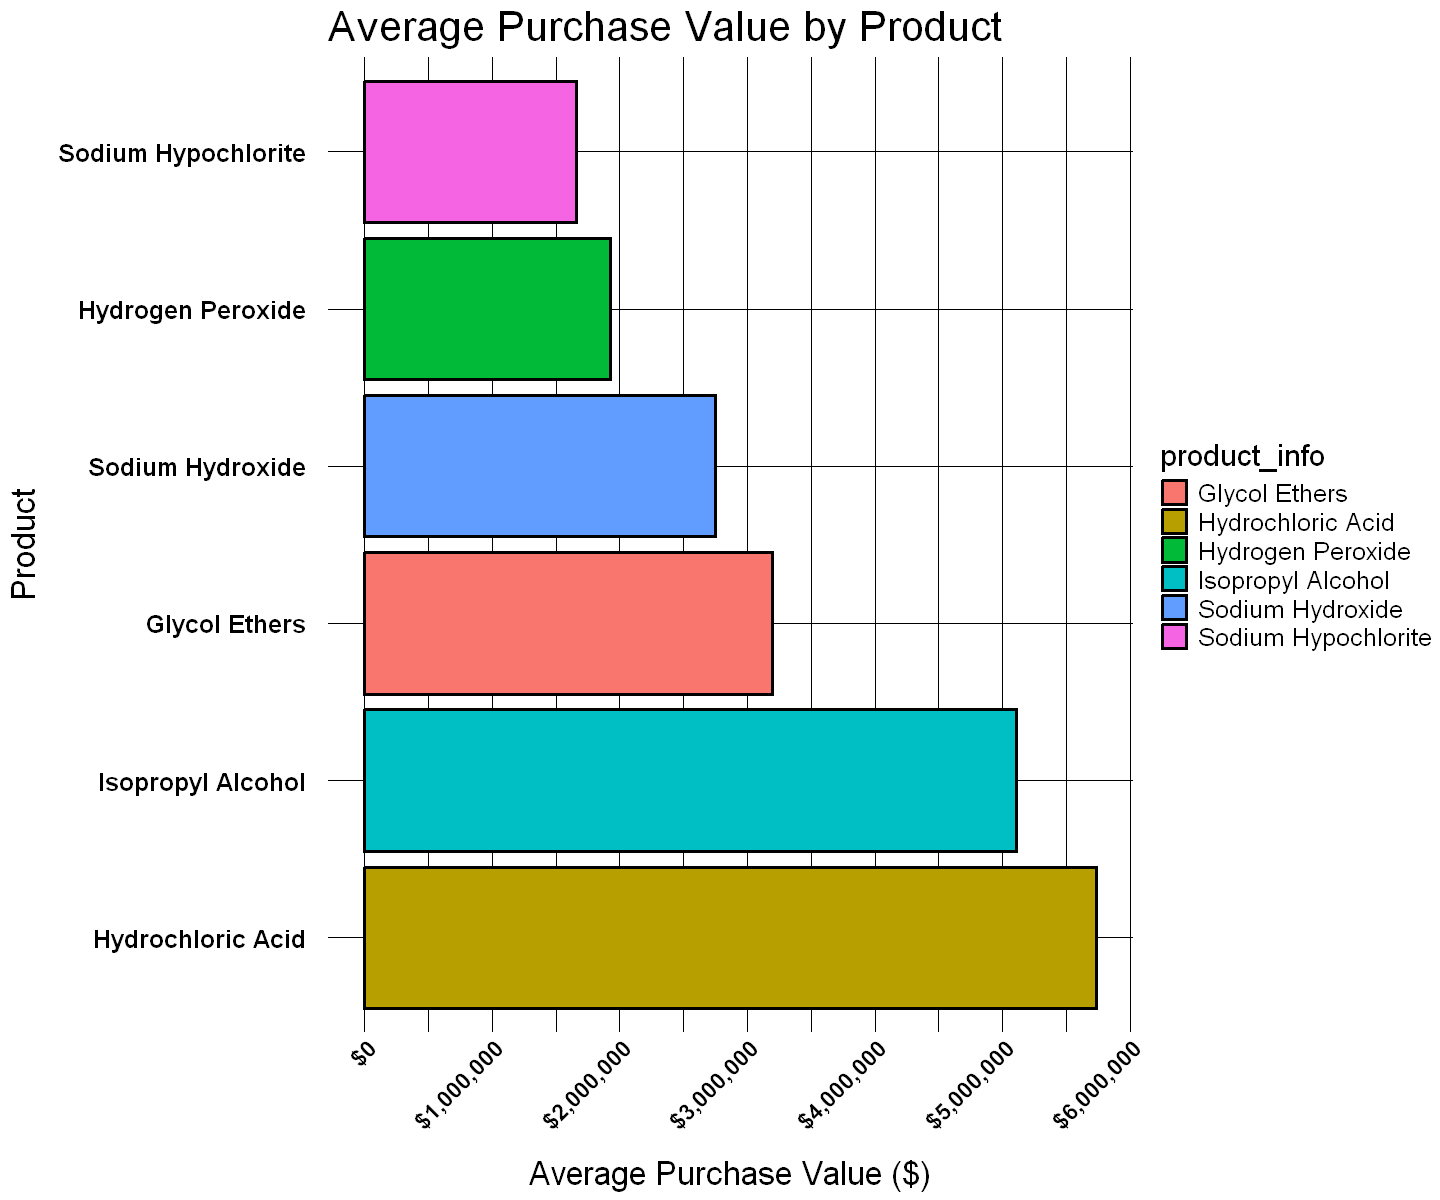

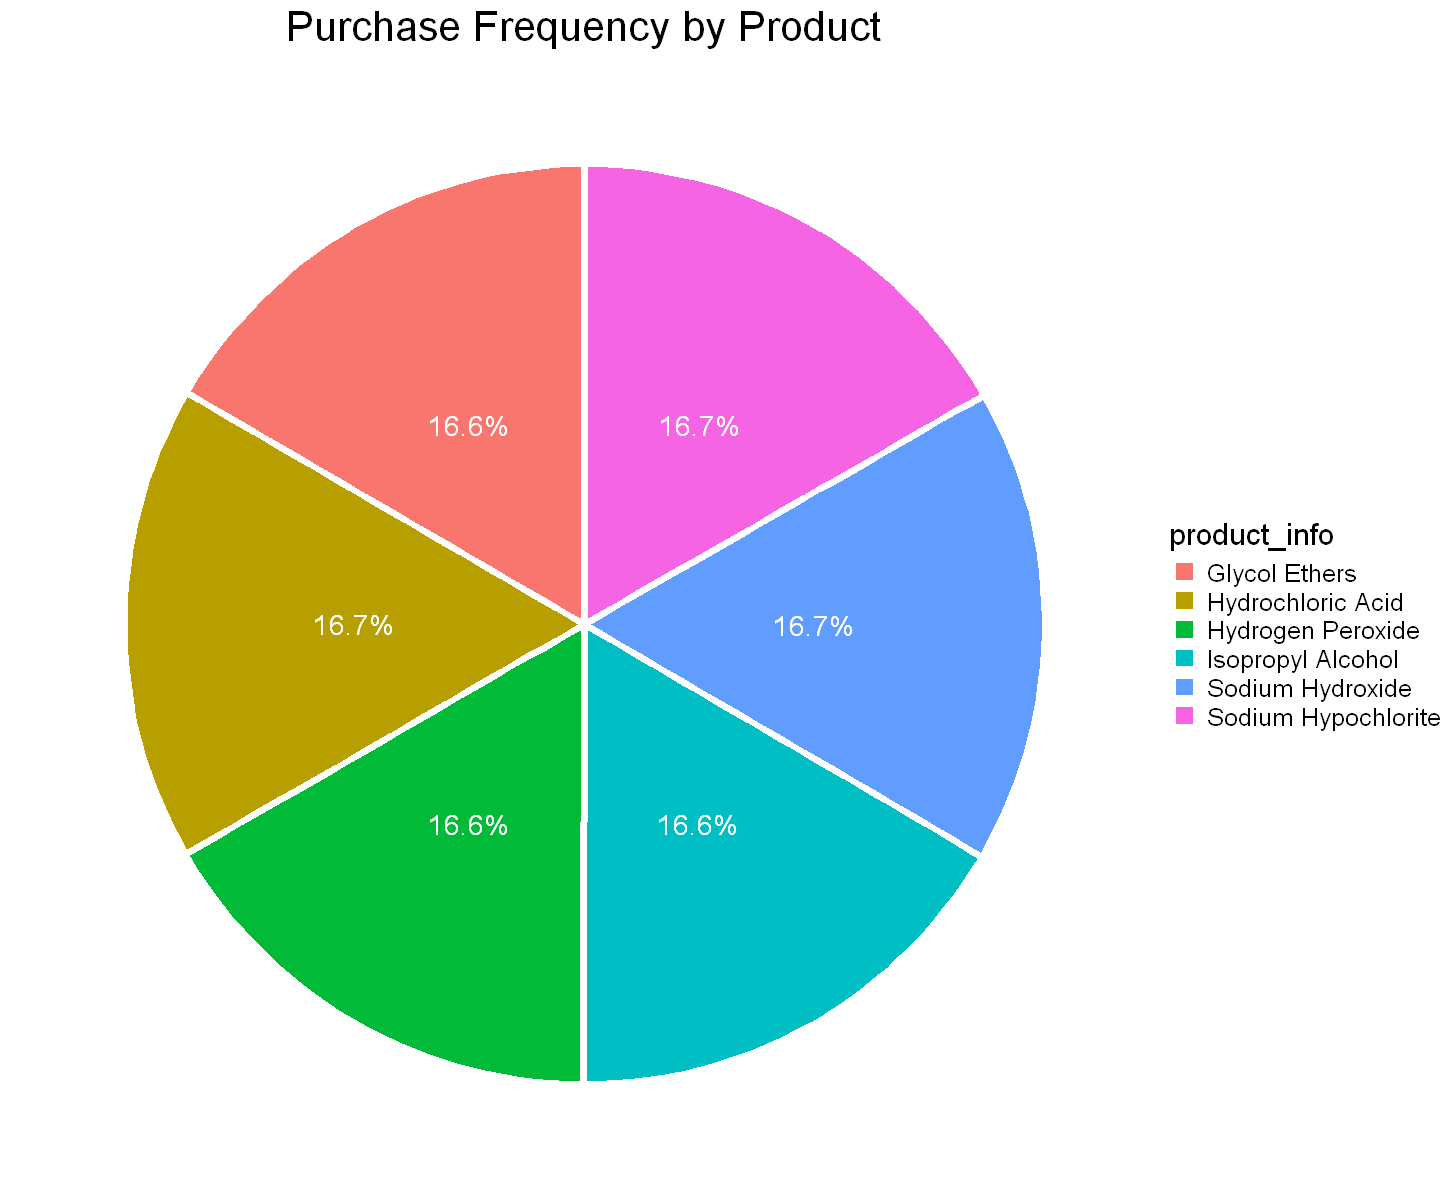

In [15]:
# Libraries, dplyr = data manipulation functions, ggplot2 = more advanced plotting functions, and scales = transforming data for plots.
library(dplyr)
library(ggplot2)
library(scales)

# Importing our file by choosing it directly from the path. 
file_path <- file.choose()
 
# Using the file to create a DataFrame('df'). 
df <- read.csv(file_path)

# Dividing purchase value and frequency into groups by the product using pipe operations.
pipe_df <- df %>%     
  group_by(product_info) %>%
  summarize(average_purchase_value = sum(average_purchase_value), 
            product_frequency = sum(product_frequency))

# Create a new column finding the percentage of frequency for each of our products.
pipe_df$percentage <- pipe_df$product_frequency / sum(pipe_df$product_frequency) * 100

# Visualizing the plot in regard to the average purchase value by product in bar format.
options(repr.plot.width = 12, repr.plot.height = 10)
ggplot(pipe_df, aes(reorder(x = product_info, -average_purchase_value), 
                    y = average_purchase_value, fill = product_info)) +
  geom_bar(stat = "identity", linewidth = 1, color = "black") +
  coord_flip() +
  labs(title = "Average Purchase Value by Product", x = "Product", y = "Average Purchase Value ($)") +

  scale_y_continuous(labels = scales::dollar_format(), 
                     breaks = c(0, 1000000, 2000000, 3000000, 4000000, 5000000, 6000000)) +

    theme_minimal() +
    theme(panel.grid = element_line(color = "black", linewidth = .5)) + 
    theme(axis.text.x = element_text(size = 14, angle = 45, hjust = 1, face = "bold", color = "black",
                        margin = margin(b = 10)),
        axis.text.y = element_text(size = 15, face = "bold", color = "black", 
                      margin = margin(l = 10, r = 10)),
        plot.title = element_text(size = 25),
        axis.title = element_text(size = 20),
        legend.text = element_text(size = 15),
        legend.title = element_text(size = 18))

# Visualizing product frequency via a pie chart, converted into a pie chart via 'coord_polar()'.
options(repr.plot.width = 12, repr.plot.height = 10)
ggplot(pipe_df, aes(x = "", y = product_frequency, fill = product_info)) +
  geom_bar(stat = "identity", linewidth = 2, color = "white") +
  coord_polar(theta = "y") +
  labs(title = "Purchase Frequency by Product") +
  geom_text(aes(label = paste0(round(percentage, 1), "%")), 
            position = position_stack(vjust = 0.5), size = 6, color = "white") +

  theme_void() + 
  theme(plot.title = element_text(size = 25, hjust = 0.5),
        legend.text = element_text(size = 15),
        legend.title = element_text(size = 18))

**The "Average Purchase Value by Product" bar plot outputs a wide variety of purchase values in which the products are divided into a theoretical hierarchy. Hydrochloric Acid and Isopropyl Alcohol are seen to be the products with the highest purchase value, showing a respectable 5,800,000 + dollars and 5,500,000 + dollars.** 

**The second tier of the purchase value hierarchy shows a remarkably fewer statistics in which Glycol Ethers and Sodium Hydroxide show 3,000,000 + dollars and 2,500,000 + dollars. This value is remarkably less than the previous 5,500,000 + revenue seen above.**

**The last tier shows the lowest purchased chemicals in our product line, with Hydrogen Peroxide and Sodium Hypochlorite which make 1,900,000 + dollars and 1,700,000 + dollars. Considering the top purchasers make on average 5,500,000 + dollars, our lowest bulk purchased products on average make 65% less profit per average purchase.**

**Based on the data previously shown, it seems that Sodium Hypochlorite is the most purchased chemical in our lineup showing a fantastic 6,000,000 gallons, however, on average purchase value, it seems to be the lowest earner. Contrasting with this, Isopropyl Alcohol is shown to be the lowest purchased product in our lineup, yet it makes the second most revenue in terms of average purchases.** 

This data indicates that our revenue is most likely dominated by product demand rather than product price. 

**Our second plot, the "Purchase Frequency by Product" pie chart, visualizes a shocking revelation. In total, our products are purchased at the same frequency as each other, however, each product is bought at a different purchase amount constituting the difference in product demand and in all, revenue.**

The output perfectly visualizes each product is bought at the same frequency, yet the average purchase value and even purchase amount are vastly different. 

This outcome displays the point that ChemTech's revenue is largely influenced by product demand as frequency and price are shown to be less effective in product purchasing. 

## What are the most and least purchased products?

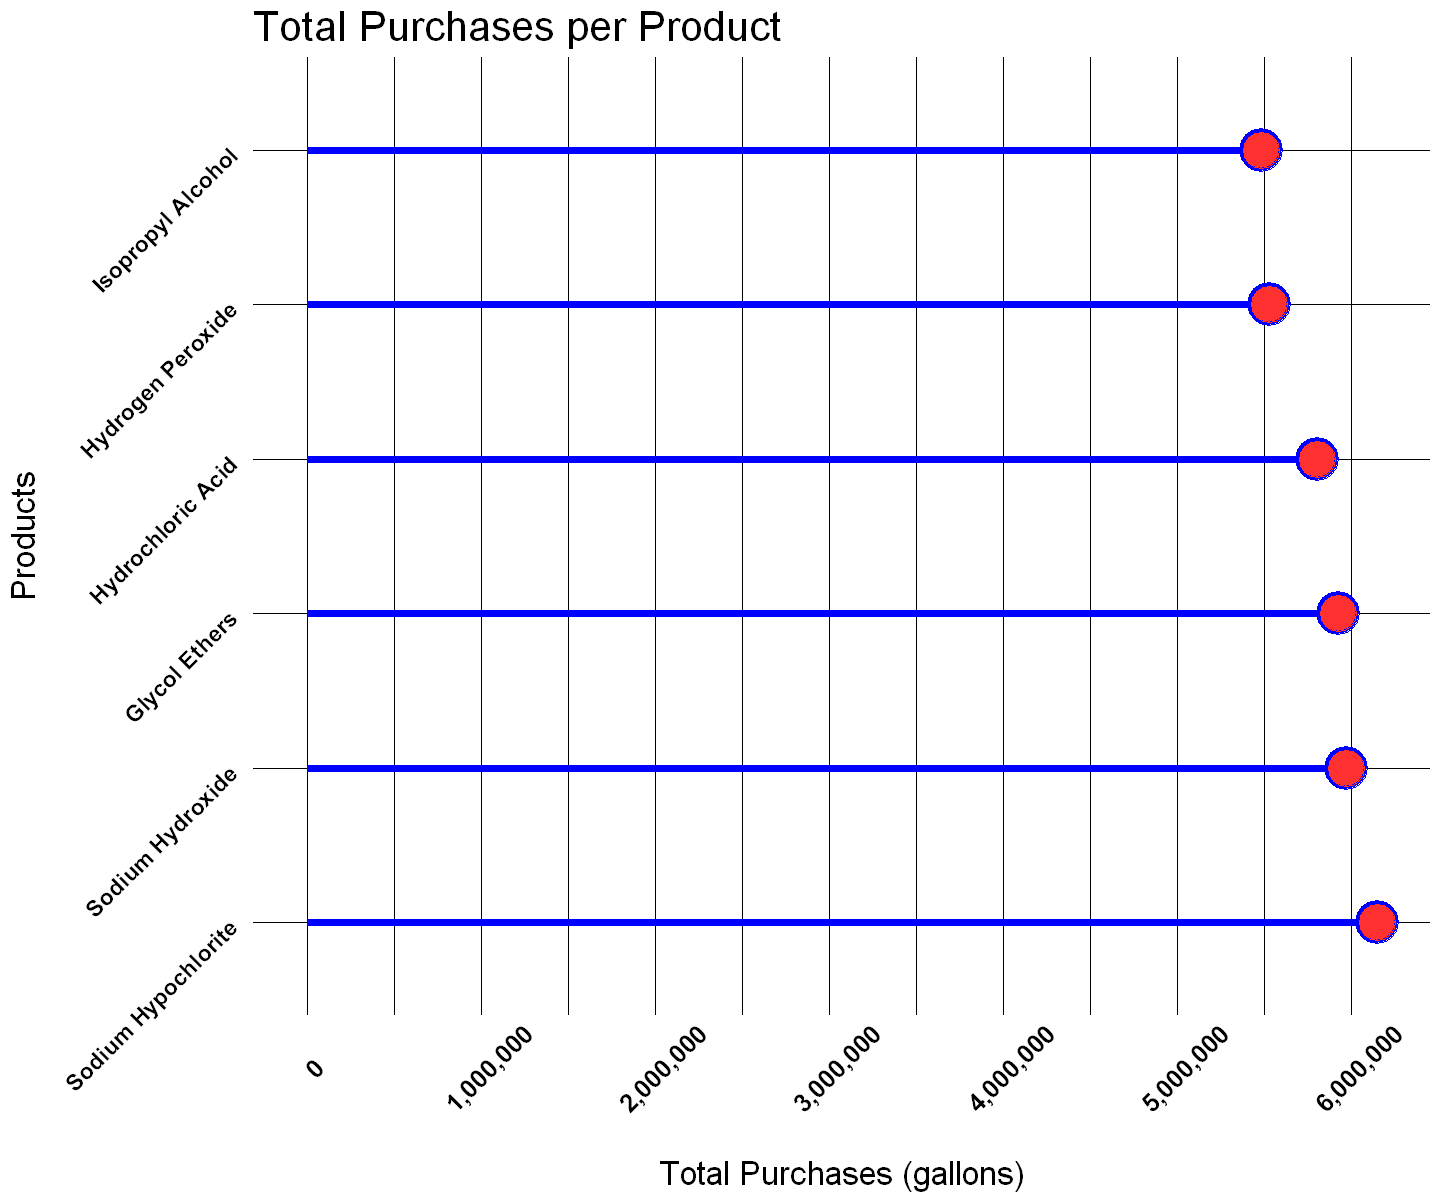

In [16]:
# Libraries, ggplot2 = more advanced plotting functions, and scales = transforming data for plots.
library(ggplot2)
library(scales)

# Importing our file by choosing it directly from the path. 
file_path <- file.choose()

# Using the file to create a DataFrame('df').
df <- read.csv(file_path)

# Visualizing the plot in regard to the most & least purchased products in a lollipop format.
options(repr.plot.width = 12, repr.plot.height = 10)
ggplot(df, aes(reorder(x = product_info, -total_purchases), y = total_purchases)) +
    geom_segment(aes(xend = product_info, yend = total_purchases, y = 0), color = "blue", linewidth = 2) +
    geom_point(color = "blue", size = 12) +
    geom_point(color = "firebrick1", size = 10) +
    coord_flip() +
    labs(title = "Total Purchases per Product", x = "Products", y = "Total Purchases (gallons)") +
    scale_y_continuous(labels = scales::comma, 
                       breaks = c(0, 1000000, 2000000, 3000000, 4000000, 5000000, 6000000)) +

# Manipulating the text values to be more attractive. 
    theme_minimal() +
    theme(panel.grid = element_line(color = "black", linewidth = .5)) +
    theme(axis.text.x = element_text(size = 15, angle = 45, face = "bold", color = "black", 
                        margin = margin(t = 25)),
        axis.text.y = element_text(size = 14, angle = 45, face = "bold", color = "black", 
                        margin = margin(r = 10)),
        plot.title = element_text(size = 25),
        axis.title = element_text(size = 20))

**The output above visualizes the narrow yet differing results shown in the "Total Purchases per Product" lollipop plot. All of the products listed have sold impressively over 5,000,000 products each, however some have sold more than others.**

**At the top of the purchase hierarchy, Sodium Hypochlorite is shown to be the most sold product in general, reaching more than 6,000,000 gallons sold. On the opposite side, Isopropyl Alcohol, while remarkable, still sold around 600,000 gallons less at about 5,500,000 gallons sold.**

Based on the lollipop chart's data visualization it seems that overall the most popular product in ChemTech's product line is Sodium Hypochlorite, while the least popular is Isopropyl Alcohol. As of right now, the leaders in profit are still yet to be visualized however, this data can allow us to hypothesize on  what they may be.

It's important to note that based on this data as well as the previous visualizations, our product revenue seems to be highly based on product demand and popularity, regardless of price.

## How has the sales volume changed over time for each product?

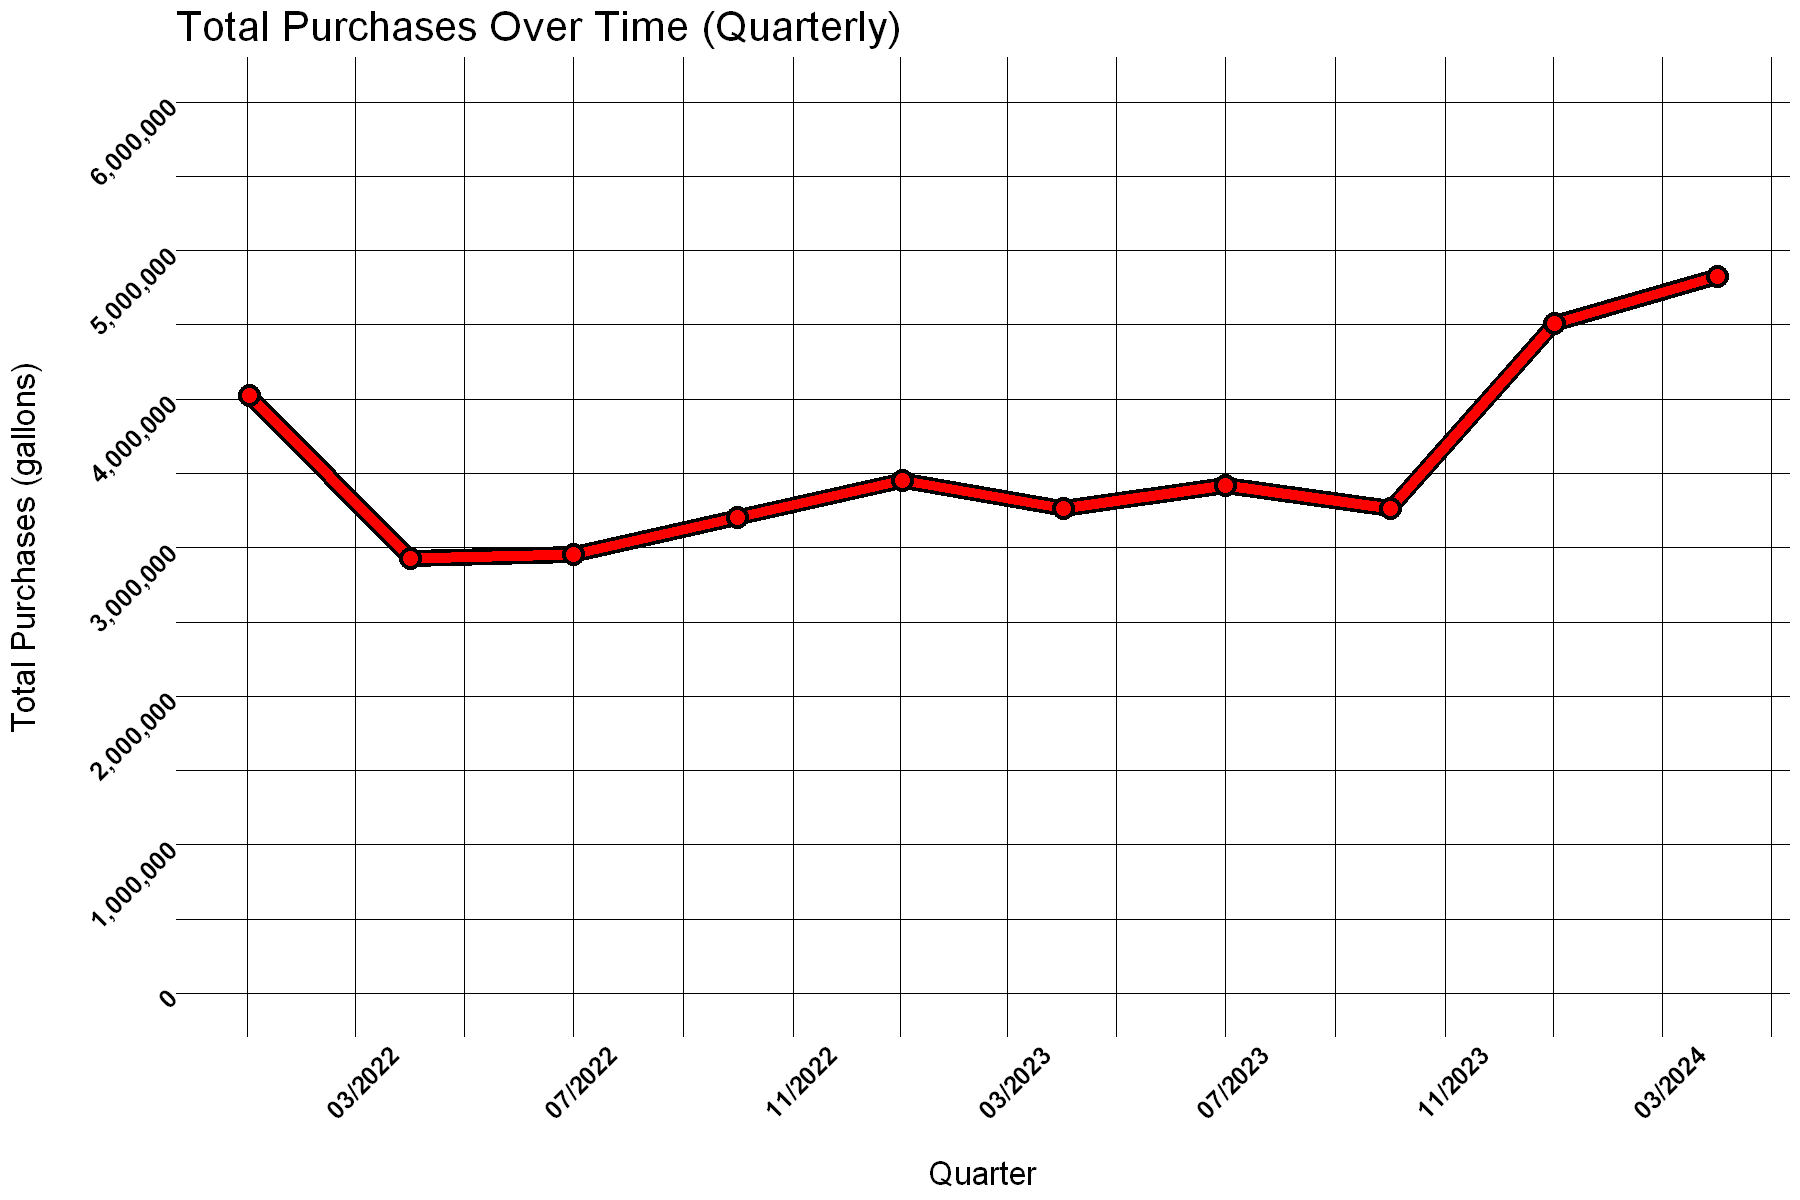

In [18]:
# Libraries, ggplot2 = more advanced plotting functions, scales = transforming data for plots.
# dplyr = data manipulation, and lubridate = time manipulation. 
library(ggplot2)
library(scales)
library(dplyr)
library(lubridate)

# Importing our file by choosing it directly from the path. 
file_path <- file.choose()

# Using the file to create a DataFrame('df').
df <- read.csv(file_path)

# Due to the transfering of data from Github -> R, the date format changed from 2022/01/01 -> 44562.
# This function will convert the data back to its original format.
df$purchase_date <- as.Date(df$purchase_date, origin = "1899-12-30")

# Dividing the total product purchases into quarterly(4 months) groups. 
quarterly_df = df %>%
    mutate(quarter = floor_date(purchase_date, "quarter")) %>%
    group_by(quarter) %>%
    summarise(total_purchases = sum(total_purchases))

# Visualizing the graph via a Line with change points. 
options(repr.plot.width = 15, repr.plot.height = 10)
ggplot(quarterly_df, aes(x = quarter, y = total_purchases)) +
    geom_line(stat = "identity", linewidth = 5, color = "black") +
    geom_line(stat = "identity", linewidth = 3, color = "red") +
    geom_point(color = "black", size = 6) +
    geom_point(color = "red", size = 4) +
    labs(title = "Total Purchases Over Time (Quarterly)", x = "Quarter", y = "Total Purchases (gallons)") +
    scale_x_date(date_labels = "%m/%Y", date_breaks = "4 months") +
    scale_y_continuous(label = scales::comma,
                      breaks = c(0, 1000000, 2000000, 3000000, 4000000, 5000000, 6000000),
                      limits = c(0,6000000)) + 

# Manipulating the graph to have no background color, and changing text values.
    theme_minimal() +
    theme(panel.grid = element_line(color = "black", linewidth = .5)) +
    theme(axis.text.x = element_text(size = 15, angle = 45, face = "bold", color = "black", 
                        margin = margin(t = 20)),
          axis.text.y = element_text(size = 15, angle = 45, face = "bold", color = "black",
                        margin = margin(l = 20)),
          plot.title = element_text(size = 25),
          axis.title = element_text(size = 20))

**The "Total Purchases Over Time (Quarterly)" line plot visualizes how time and seasons may affect purchase patterns within ChemTech. Based on the data above it seems that the start of the year is normally when sales seem to peak, sharply decline, then slowly incline until a massive rise at the end of the year, stabilize, and then repeat.**

**Based on this data, it seems that sales seems to peak at the top between 4,000,000 - 5,000,000 gallons and peak at the bottom around 3,000,000 - 3,350,000 gallons. On average the sales amount by month seems to fizzle around 3,500,000.** 

Based on this data it's safe to assume that ChemTech's products take a boost in sales around the end of the year to the beginning. Around mid-year the sales decline and slowly rise to repeat the cycle. Seasonal patterns could possibly cause a larger demand as colder months might cause more deterioration in machinery, forcing demand to increase.

## Which products generate the highest and lowest revenue?

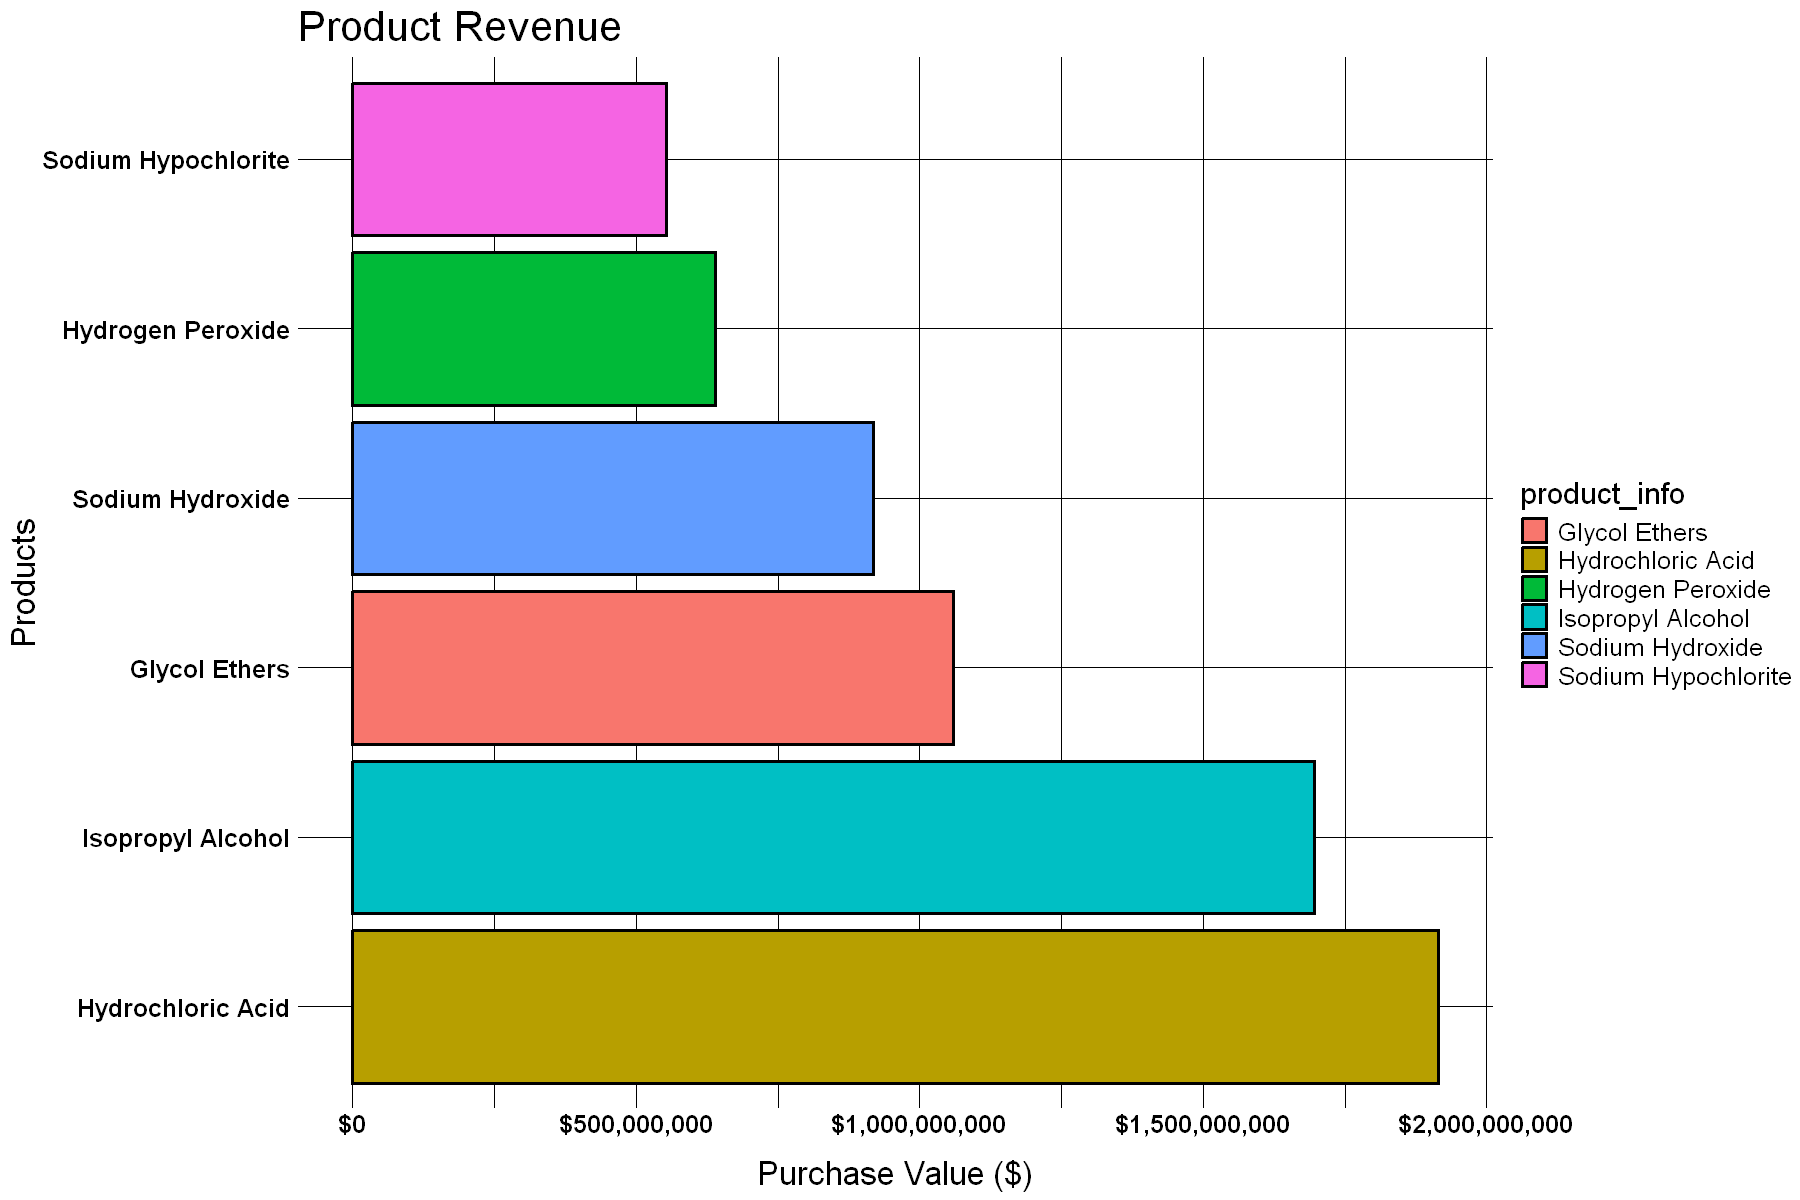

In [19]:
# Libraries, ggplot2 = more advanced plotting functions, scales = transforming data for plots,
# and dplyr = data manipulation. 
library(ggplot2)
library(scales)
library(dplyr)

# Importing our file by choosing it directly from the path. 
file_path <- file.choose()

# Using the file to create a DataFrame('df').
df <- read.csv(file_path)

# Creating a new DataFrame that groups revenue by product. 
rev_df <- df %>%
    group_by(product_info) %>%
    summarize(purchase_value = sum(purchase_value))

# Visualizing the plot with a Bar.
options(repr.plot.width = 15, repr.plot.height = 10)
ggplot(rev_df, aes(reorder(product_info, -purchase_value), y = purchase_value, fill = product_info)) +
    geom_bar(stat = "identity", linewidth = 1, color = "black") +
    coord_flip() +
    labs(title = "Product Revenue", x = "Products", y = "Purchase Value ($)") +
    scale_y_continuous(labels = scales::dollar_format()) +

# Manipulating the background, gridlines, and text values.
    theme_minimal() +
    theme(panel.grid = element_line(color = "black", linewidth = .5)) + 
    theme(axis.text.x = element_text(size = 15, face = "bold", color = "black",
                        margin = margin(b = 10)),
          axis.text.y = element_text(size = 15, face = "bold", color = "black"),
          plot.title = element_text(size = 25),
          axis.title = element_text(size = 20),
          legend.text = element_text(size = 15),
          legend.title = element_text(size = 18))

The "Product Revenue" bar chart displays each product's revenue amount organized in ascending order. Based on the data above, a 3-tier hierarchy is noticed which reveals the top as well as bottom earners in ChemTech's product line. 

**At the top of our chart, our bottom earners are observed. Sodium Hypochlorite, as well as Hydrogen Peroxide, are the lowest earners. However, they are noted to still sell a reputable 550,000,000 - 650,000,000 dollars.**

**In the middle, our mid-earners are listed. Sodium Hydroxide and Glycol Ethers make up the middle stage of the revenue hierarchy. With a respectable revenue range of between 900,000,000 - 1,060,000,000 dollars.**

**Lastly, the top earners are shown at the bottom of our chart. Isopropyl Alcohol and Hydrochloric Acid make up the flagship revenue producers ChemTech's product line can offer. Their revenue range displays a remarkable 1,600,000,000 - 1,900,000,000 dollars.**

## Conclusion

The analysis of ChemTech's product details as well as revenue has been completed! Based on the compilation of data analyzed and visualized it is safe to highlight a few important details revealed above. 

#### Purchase Quantity

"Sodium Hypochlorite" is observed to be the product with the most purchase quantity sold, selling over 6,000,000 gallons.

On the other hand, "Isopropyl Alcohol" is the product with the least purchase quantity sold, selling around 5,500,000 gallons. 

#### Average Purchase Value

"Hydrochloric Acid" has the largest average purchase value for each transaction at around $5,500,000.

"Sodium Hypochlorite" has the smallest average purchase value for each transaction at around $1,600,000.

#### Purchase Frequency

All products have the same purchase frequency at around 16.6% equally. 

#### Seasonal Patterns

Purchases rise around the end of the year, peak at the start, and sharply drop only to slowly incline and repeat the process. 

#### Product Revenue

"Hydrochloric Acid" is the product associated with the largest revenue found, at around $1,900,000,000.

"Sodium Hypochlorite" is the product associated with the lowest revenue found, at around $550,000,000.

## Plan

Based on the data gathered through this analysis, possible solutions to product demand, frequency, and customer satisfaction will be handled below.

A financial plan comprised of discounts and bundles can be proposed. The plan consists of bulk discounts based on every 10,000 products bought, discounts for continuous purchasing, and holiday promotions in which products/shipping are discounted. This plan is thought to increase customer satisfaction, improve company loyalty, and increase sales. A survey will be sent out via the marketing department to returning customers.

Due to seasonal patterns that were noticed possibly due to increased machine maintenance in the colder months, a discounting plan in colder months can be proposed. A possible promotion in which products are sent for free with a purchase of x amount of products bought. This can allow customers the feeling of loyalty, protection, and satisfaction.  

Lastly, revenue was a massive revelation. Our lowest earner, "Sodium Hypochlorite" while having the most gallons purchased earned around 550,000,000 dollars. On the contrary "Hydrochloric Acid" earned around 1,900,000,000 dollars with a median gallon purchase amount. Due to this statistic, it is advised to either invest in marketing promotions to bump up "Hydrochloric Acid's" purchase amount or increase the gallon price of "Sodium Hypochlorite" if the intended goal is to increase product revenue. A possible product increase is risky due to the fact customer loyalty should be the primary concern, however, if enough research is commenced or a marketing plan is finalized this could be a  massive break. A possible plan could be increased product prices as well as bulk, holiday, and return discounts therefore returning customers aren't affected but newer customers can be. 

# Thank you for participating in ChemTech's Transactional Data Analysis!